Idea: Unveiling the Android App Market: Analyzing Google Play Store Data

Description:
Clean, categorize, and visualize Google Play Store data to understand app market dynamics.

Gain in-depth insights into the Android app market by leveraging data analytics, visualization,
and enhanced interpretation skills.



Data Preparation:
Clean and correct data types for accuracy.
Category Exploration:
Investigate app distribution across categories.
Metrics Analysis:
Examine app ratings, size, popularity, and pricing trends.
Sentiment Analysis:
Assess user sentiments through reviews.
Interactive Visualization:
Utilize code for compelling visualizations.
Skill Enhancement:
Integrate insights from the "Understanding Data Visualization" course

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
apps_df= pd.read_csv("C:/Users/asus/Downloads/archive (5)/datasets/apps.csv")
reviews_df= pd.read_csv("C:/Users/asus/Downloads/archive (5)/datasets/user_reviews.csv")

In [38]:
apps_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [39]:
apps_df.shape

(9659, 14)

In [40]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [41]:
apps_df.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [42]:
# Remove the 'Unnamed: 0' column from apps_df
apps_df.drop(columns=['Unnamed: 0'], inplace=True)

In [43]:
# Convert 'Installs' to numeric by removing commas and plus signs, and converting to int
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

In [44]:
# Convert 'Price' to numeric by removing the dollar sign and converting to float
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

In [45]:
# Convert 'Last Updated' to datetime
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])

In [46]:
# Handle missing values in reviews_df
reviews_df['Translated_Review'] = reviews_df['Translated_Review'].fillna('')
reviews_df['Sentiment'] = reviews_df['Sentiment'].fillna('Neutral')
reviews_df['Sentiment_Polarity'] = reviews_df['Sentiment_Polarity'].fillna(0.0)
reviews_df['Sentiment_Subjectivity'] = reviews_df['Sentiment_Subjectivity'].fillna(0.0)


In [47]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,,Neutral,0.00,0.000000
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [48]:
reviews_df.shape

(64295, 5)

In [49]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       64295 non-null  object 
 2   Sentiment               64295 non-null  object 
 3   Sentiment_Polarity      64295 non-null  float64
 4   Sentiment_Subjectivity  64295 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [50]:
reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,64295.000000,64295.000000
mean,0.106044,0.286848
std,0.282700,0.313673
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.200000
75%,0.210093,0.555556
max,1.000000,1.000000


In [51]:
# Handle missing values in reviews_df
reviews_df['Translated_Review'] = reviews_df['Translated_Review'].fillna('')
reviews_df['Sentiment'] = reviews_df['Sentiment'].fillna('Neutral')
reviews_df['Sentiment_Polarity'] = reviews_df['Sentiment_Polarity'].fillna(0.0)
reviews_df['Sentiment_Subjectivity'] = reviews_df['Sentiment_Subjectivity'].fillna(0.0)


In [52]:
sns.set_style("whitegrid")

In [70]:
import pandas as pd

# Count the number of apps in each category
category_count = apps_df['Category'].value_counts()

# Convert to DataFrame for better readability
category_summary = category_count.reset_index()
category_summary.columns = ['Category', 'Number of Apps']

# Display the summary
print(category_summary)


               Category  Number of Apps
0                FAMILY            1832
1                  GAME             959
2                 TOOLS             827
3              BUSINESS             420
4               MEDICAL             395
5       PERSONALIZATION             376
6          PRODUCTIVITY             374
7             LIFESTYLE             369
8               FINANCE             345
9                SPORTS             325
10        COMMUNICATION             315
11   HEALTH_AND_FITNESS             288
12          PHOTOGRAPHY             281
13   NEWS_AND_MAGAZINES             254
14               SOCIAL             239
15  BOOKS_AND_REFERENCE             222
16     TRAVEL_AND_LOCAL             219
17             SHOPPING             202
18               DATING             171
19        VIDEO_PLAYERS             163
20  MAPS_AND_NAVIGATION             131
21            EDUCATION             119
22       FOOD_AND_DRINK             112
23        ENTERTAINMENT             102


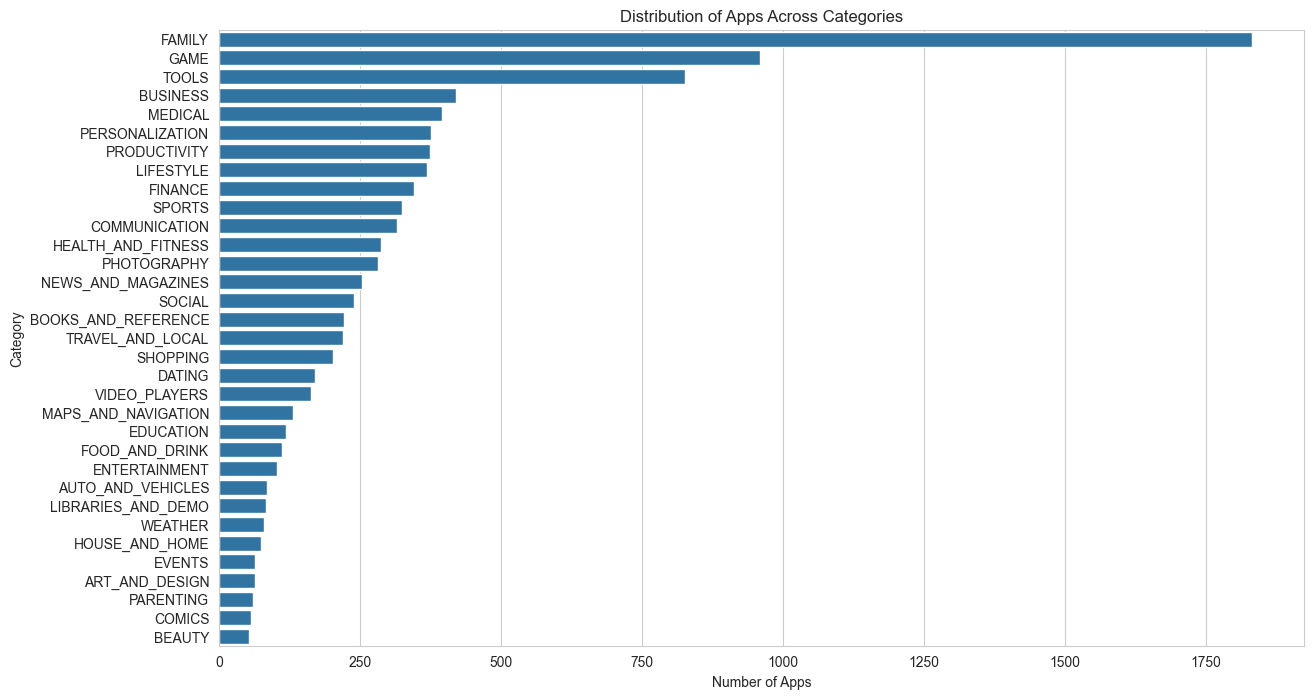

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 8))

# Count the number of apps in each category
category_count = apps_df['Category'].value_counts()

# Create a horizontal bar plot without palette
sns.barplot(y=category_count.index, x=category_count.values)

# Set plot titles and labels
plt.title('Distribution of Apps Across Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')

# Show the plot
plt.show()


 
## Chart Analysis:
Chart 1: Distribution of Apps Across Categories

Observation: The bar chart shows the number of apps in various categories. The largest categories are 'FAMILY,' 'GAME,' and 'TOOLS,' while the smallest are 'COMICS' and 'BEAUTY.'

Conclusion: Developers focus heavily on FAMILY, GAME, and TOOLS, likely due to high user demand and engagement. Niche categories like COMICS and BEAUTY have fewer apps, indicating less developer interest or user demand.

Solution: Developers might consider investing in less saturated markets like COMICS and BEAUTY, where there's less competition. For popular categories, aim for higher quality and unique features.

In [54]:
# Metrics Analysis

In [71]:
# Summary statistics of app ratings
rating_summary = apps_df['Rating'].describe()

# Display the summary
print(rating_summary)


count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


In [72]:
# Count the number of apps in each rating bin
rating_bins = pd.cut(apps_df['Rating'], bins=30)
rating_distribution = rating_bins.value_counts().sort_index()

# Convert to DataFrame for better readability
rating_distribution_summary = rating_distribution.reset_index()
rating_distribution_summary.columns = ['Rating Bin', 'Number of Apps']

# Display the frequency distribution
print(rating_distribution_summary)


        Rating Bin  Number of Apps
0   (0.996, 1.133]              16
1   (1.133, 1.267]               1
2     (1.267, 1.4]               3
3     (1.4, 1.533]               3
4   (1.533, 1.667]               4
5     (1.667, 1.8]              16
6     (1.8, 1.933]              11
7   (1.933, 2.067]              12
8     (2.067, 2.2]              22
9     (2.2, 2.333]              20
10  (2.333, 2.467]              19
11    (2.467, 2.6]              44
12    (2.6, 2.733]              23
13  (2.733, 2.867]              40
14    (2.867, 3.0]             126
15    (3.0, 3.133]              69
16  (3.133, 3.267]              63
17    (3.267, 3.4]             226
18    (3.4, 3.533]             156
19  (3.533, 3.667]             167
20    (3.667, 3.8]             510
21    (3.8, 3.933]             359
22  (3.933, 4.067]             513
23    (4.067, 4.2]            1431
24    (4.2, 4.333]             897
25  (4.333, 4.467]             895
26    (4.467, 4.6]            1531
27    (4.6, 4.733]  

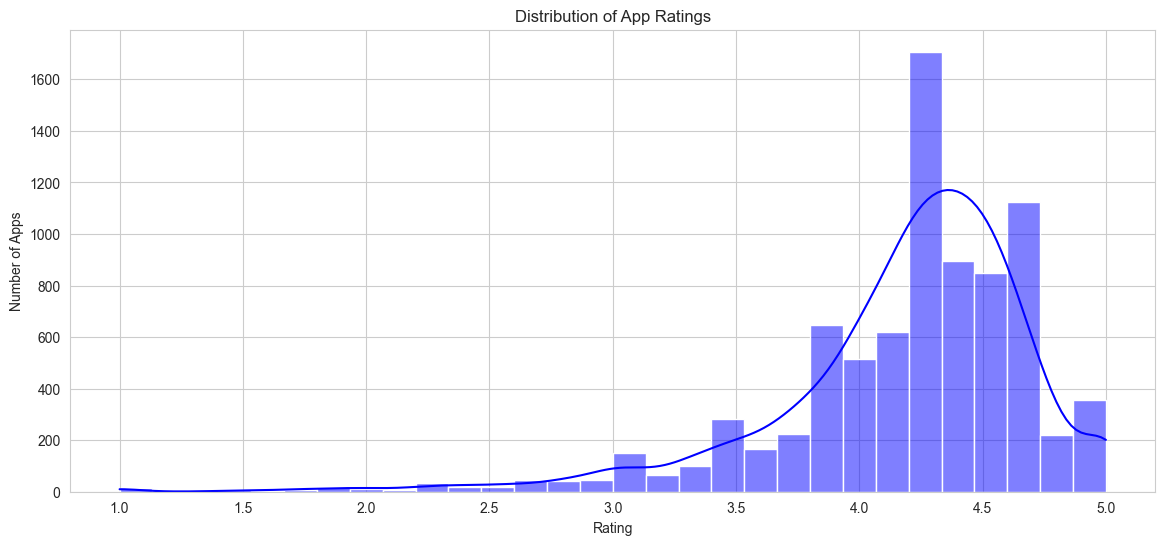

In [55]:
# Distribution of app ratings
plt.figure(figsize=(14, 6))
sns.histplot(apps_df['Rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

## Chart 2: Distribution of App Ratings

Observation: The histogram with a density plot overlay shows the majority of app ratings are clustered between 3.5 and 5.0, with a peak around 4.5.

Conclusion: Most apps are rated favorably, suggesting positive user experiences or removal of poorly rated apps.

Solution: Developers should focus on maintaining and improving ratings by addressing user feedback and ensuring quality updates.



In [73]:
# Count the number of apps in each size bin
size_bins = pd.cut(apps_df['Size'], bins=30)
size_distribution = size_bins.value_counts().sort_index()

# Convert to DataFrame for better readability
size_distribution_summary = size_distribution.reset_index()
size_distribution_summary.columns = ['Size Bin', 'Number of Apps']

# Display the frequency distribution
print(size_distribution_summary)


            Size Bin  Number of Apps
0      (-0.1, 3.333]            1461
1     (3.333, 6.667]            1429
2      (6.667, 10.0]            1041
3     (10.0, 13.333]             540
4   (13.333, 16.667]             477
5     (16.667, 20.0]             517
6     (20.0, 23.333]             332
7   (23.333, 26.667]             378
8     (26.667, 30.0]             356
9     (30.0, 33.333]             196
10  (33.333, 36.667]             173
11    (36.667, 40.0]             225
12    (40.0, 43.333]             121
13  (43.333, 46.667]             149
14    (46.667, 50.0]             161
15    (50.0, 53.333]              86
16  (53.333, 56.667]              82
17    (56.667, 60.0]             108
18    (60.0, 63.333]              84
19  (63.333, 66.667]              39
20    (66.667, 70.0]              74
21    (70.0, 73.333]              44
22  (73.333, 76.667]              34
23    (76.667, 80.0]              53
24    (80.0, 83.333]              40
25  (83.333, 86.667]              31
2

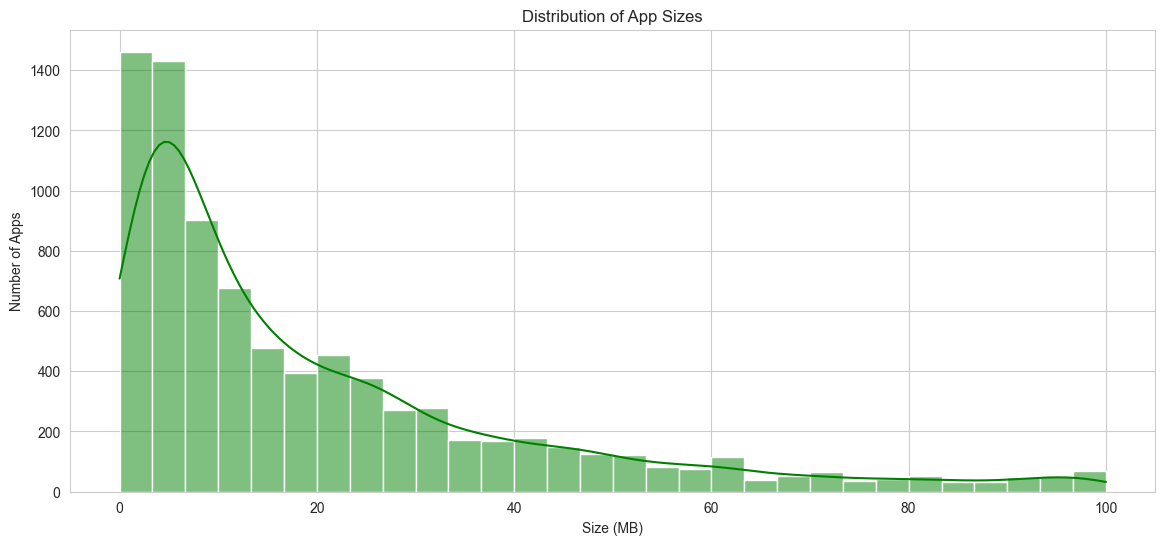

In [56]:
# Distribution of app sizes
plt.figure(figsize=(14, 6))
sns.histplot(apps_df['Size'], bins=30, kde=True, color='green')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Number of Apps')
plt.show()

## Chart 3: Distribution of App Sizes

Observation: The histogram shows most apps are relatively small, with a high concentration in the 0-10 MB range.

Conclusion: Developers aim to keep app sizes minimal for faster downloads and better performance on devices with limited storage.

Solution: Focus on optimizing apps to stay within lower size ranges while ensuring quick downloads and smooth performance.

In [74]:
# Count the number of apps in each install bin
installs_bins = pd.cut(apps_df['Installs'], bins=30)
installs_distribution = installs_bins.value_counts().sort_index()

# Convert to DataFrame for better readability
installs_distribution_summary = installs_distribution.reset_index()
installs_distribution_summary.columns = ['Installs Bin', 'Number of Apps']

# Display the frequency distribution
print(installs_distribution_summary)


                      Installs Bin  Number of Apps
0       (-1000000.0, 33333333.333]            9225
1     (33333333.333, 66666666.667]             202
2      (66666666.667, 100000000.0]             188
3     (100000000.0, 133333333.333]               0
4   (133333333.333, 166666666.667]               0
5     (166666666.667, 200000000.0]               0
6     (200000000.0, 233333333.333]               0
7   (233333333.333, 266666666.667]               0
8     (266666666.667, 300000000.0]               0
9     (300000000.0, 333333333.333]               0
10  (333333333.333, 366666666.667]               0
11    (366666666.667, 400000000.0]               0
12    (400000000.0, 433333333.333]               0
13  (433333333.333, 466666666.667]               0
14    (466666666.667, 500000000.0]              24
15    (500000000.0, 533333333.333]               0
16  (533333333.333, 566666666.667]               0
17    (566666666.667, 600000000.0]               0
18    (600000000.0, 633333333.3

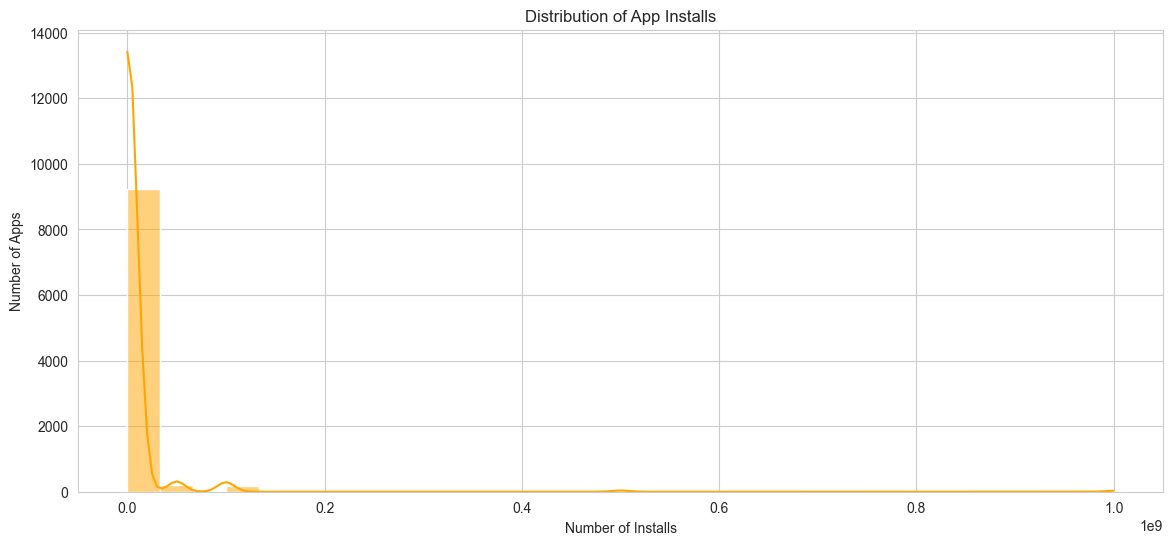

In [57]:
# Distribution of app installs
plt.figure(figsize=(14, 6))
sns.histplot(apps_df['Installs'], bins=30, kde=True, color='orange')
plt.title('Distribution of App Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Number of Apps')
plt.show()

## Chart 4: Distribution of App Installs

Observation: The histogram shows the majority of apps have a low number of installs, with a few reaching millions or billions.

Conclusion: Most apps struggle to gain significant installs due to high competition or lack of visibility, with a small percentage achieving widespread success.

Solution: Enhance app visibility through effective marketing, optimize app store presence, and continuously improve user engagement. Target underserved niches for more installs.

In [75]:
# Count the number of apps in each price bin
price_bins = pd.cut(apps_df['Price'], bins=30)
price_distribution = price_bins.value_counts().sort_index()

# Convert to DataFrame for better readability
price_distribution_summary = price_distribution.reset_index()
price_distribution_summary.columns = ['Price Bin', 'Number of Apps']

# Display the frequency distribution
print(price_distribution_summary)


             Price Bin  Number of Apps
0       (-0.4, 13.333]            9594
1     (13.333, 26.667]              30
2       (26.667, 40.0]              11
3       (40.0, 53.333]               1
4     (53.333, 66.667]               0
5       (66.667, 80.0]               2
6       (80.0, 93.333]               1
7    (93.333, 106.667]               0
8     (106.667, 120.0]               1
9     (120.0, 133.333]               0
10  (133.333, 146.667]               0
11    (146.667, 160.0]               1
12    (160.0, 173.333]               0
13  (173.333, 186.667]               0
14    (186.667, 200.0]               1
15    (200.0, 213.333]               0
16  (213.333, 226.667]               0
17    (226.667, 240.0]               0
18    (240.0, 253.333]               0
19  (253.333, 266.667]               0
20    (266.667, 280.0]               0
21    (280.0, 293.333]               0
22  (293.333, 306.667]               1
23    (306.667, 320.0]               0
24    (320.0, 333.333]   

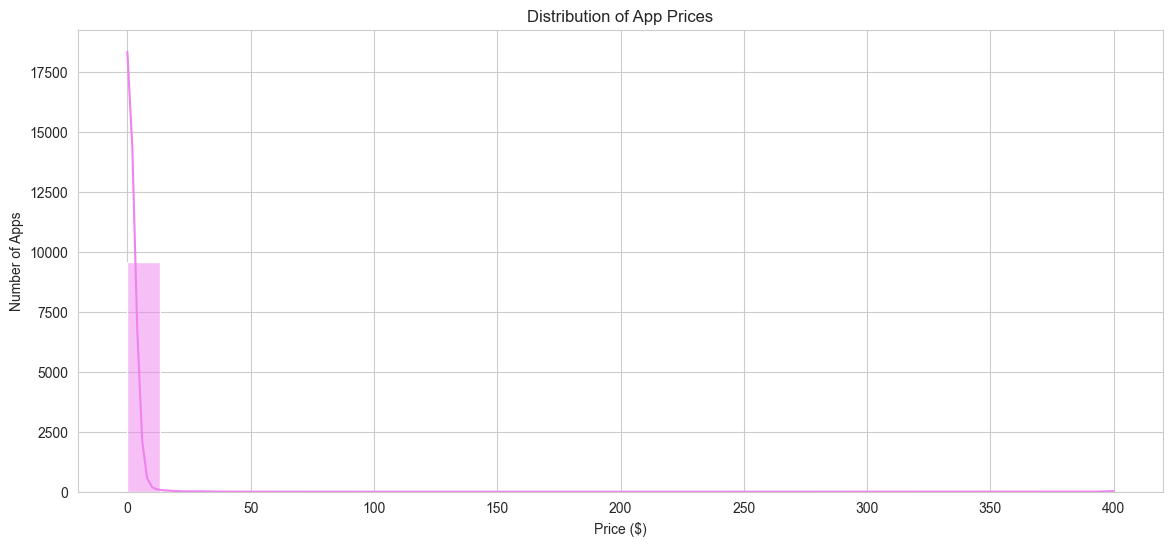

In [58]:
# Distribution of app prices
plt.figure(figsize=(14, 6))
sns.histplot(apps_df['Price'], bins=30, kde=True, color='violet')
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.show()

## Chart 5: Distribution of App Prices

Observation: The histogram with a density plot overlay shows most apps are very low-priced, with a significant number being free or under $10.

Conclusion: The market is dominated by free or low-cost apps, with higher-priced apps being rare.

Solution: Offer free or low-cost apps to attract more users, monetize through in-app purchases or ads. For higher-priced apps, ensure exceptional value and unique features.

In [76]:
# Create size bins
size_bins = pd.cut(apps_df['Size'], bins=10)

# Calculate mean ratings for each size bin
grouped_size_rating = apps_df.groupby(size_bins)['Rating'].mean().reset_index()

# Rename columns for clarity
grouped_size_rating.columns = ['Size Bin', 'Average Rating']

# Display the average rating for each size bin
print("\nAverage Rating by Size Bin:")
print(grouped_size_rating)



Average Rating by Size Bin:
        Size Bin  Average Rating
0   (-0.1, 10.0]        4.130988
1   (10.0, 20.0]        4.172903
2   (20.0, 30.0]        4.178983
3   (30.0, 40.0]        4.137248
4   (40.0, 50.0]        4.157895
5   (50.0, 60.0]        4.233460
6   (60.0, 70.0]        4.267935
7   (70.0, 80.0]        4.217742
8   (80.0, 90.0]        4.244118
9  (90.0, 100.0]        4.290506


C:\Users\asus\AppData\Local\Temp\ipykernel_5188\1068177852.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_size_rating = apps_df.groupby(size_bins)['Rating'].mean().reset_index()


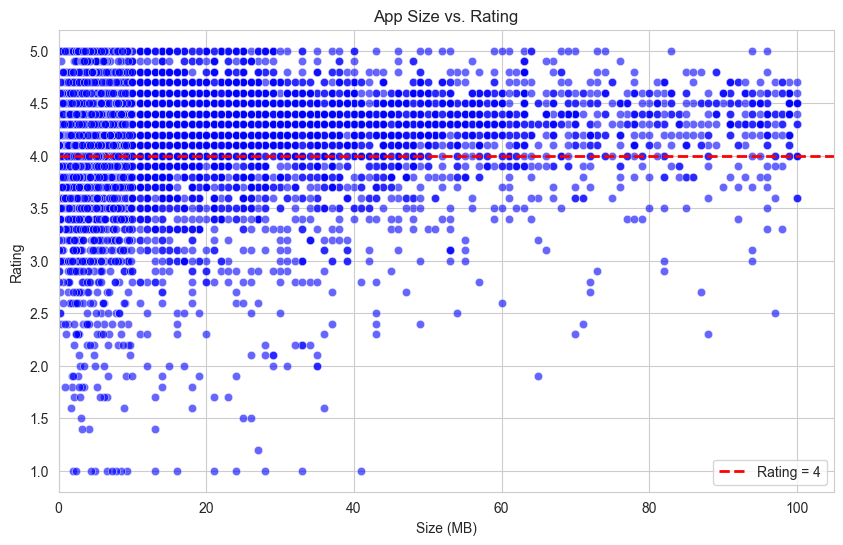

In [59]:
# Scatter plot of App Size vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=apps_df, color='blue', alpha=0.6)
plt.title('App Size vs. Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.axhline(y=4, color='red', linestyle='--', linewidth=2, label='Rating = 4')
plt.xlim(left=0)  # Ensure non-negative sizes
plt.legend()
plt.show()

## Chart 6: App Size vs. Rating

Observation: The scatter plot shows no significant influence of app size on ratings, with ratings spread across the range regardless of size.

Conclusion: Users prioritize factors other than size, such as functionality and user experience, when rating an app.

Solution: Focus on optimizing user experience and functionality to achieve higher ratings. Conduct user surveys to understand valued features.

In [78]:
# Create price bins
price_bins = pd.cut(apps_df['Price'], bins=10)

# Calculate mean ratings for each price bin
grouped_price_rating = apps_df.groupby(price_bins)['Rating'].mean().reset_index()

# Rename columns for clarity
grouped_price_rating.columns = ['Price Bin', 'Average Rating']

# Display the average rating for each price bin
print("\nAverage Rating by Price Bin:")
print(grouped_price_rating)



Average Rating by Price Bin:
        Price Bin  Average Rating
0    (-0.4, 40.0]        4.173753
1    (40.0, 80.0]        4.600000
2   (80.0, 120.0]             NaN
3  (120.0, 160.0]             NaN
4  (160.0, 200.0]             NaN
5  (200.0, 240.0]             NaN
6  (240.0, 280.0]             NaN
7  (280.0, 320.0]        3.800000
8  (320.0, 360.0]             NaN
9  (360.0, 400.0]        3.871429


C:\Users\asus\AppData\Local\Temp\ipykernel_5188\2871559526.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_price_rating = apps_df.groupby(price_bins)['Rating'].mean().reset_index()


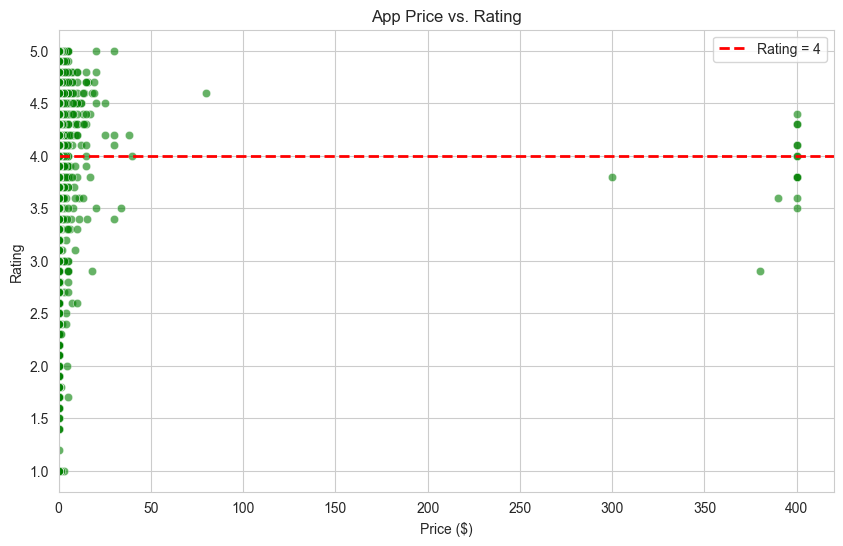

In [60]:
# Scatter plot of App Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=apps_df, color='green', alpha=0.6)
plt.title('App Price vs. Rating')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.axhline(y=4, color='red', linestyle='--', linewidth=2, label='Rating = 4')
plt.xlim(left=0)  # Ensure non-negative prices
plt.legend()
plt.show()

## Chart 7: App Price vs. Rating

Observation: The scatter plot shows price doesn't strongly affect ratings, with low-priced apps having a variety of ratings.

Conclusion: Quality, functionality, and user experience are more important to users than price when rating an app.

Solution: Prioritize improving quality and user experience regardless of price. Flexible pricing strategies can be employed

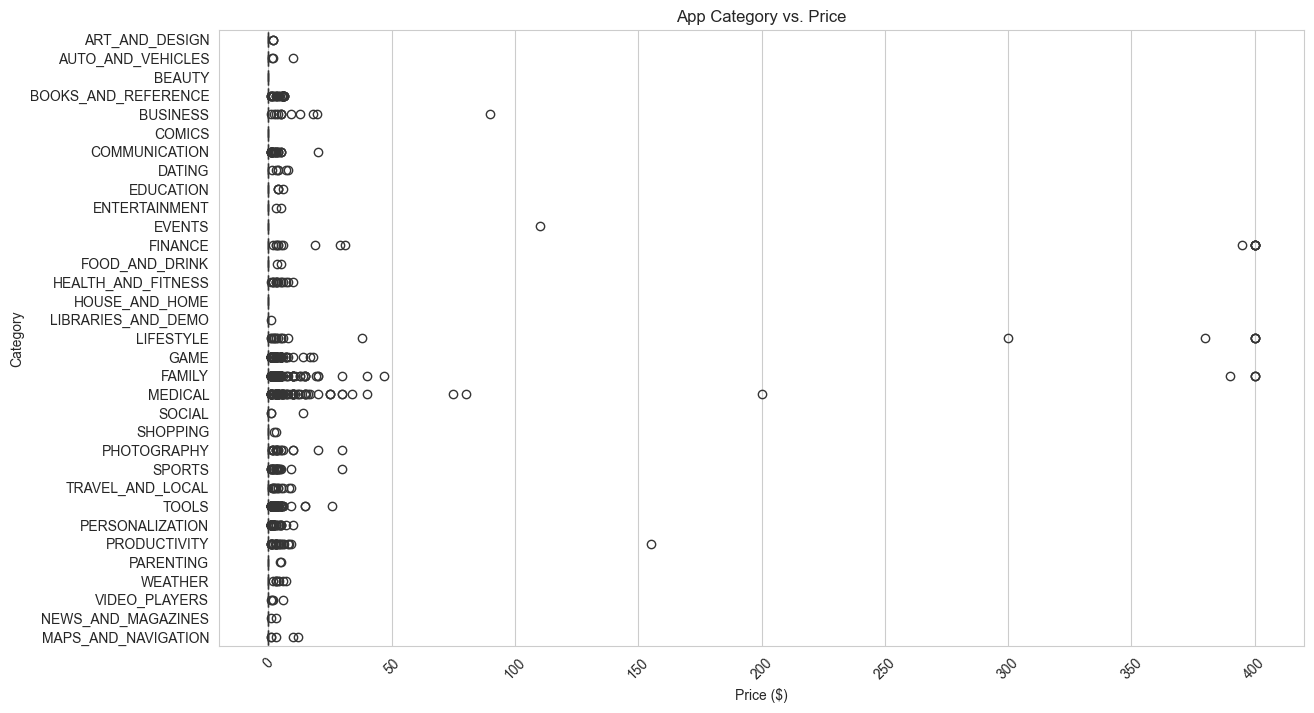

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a box plot and manually set the color from the viridis palette
sns.boxplot(x='Price', y='Category', data=apps_df, color=sns.color_palette('viridis')[0])  # Choose a color from the palette

# Set plot titles and labels
plt.title('App Category vs. Price')
plt.xlabel('Price ($)')
plt.ylabel('Category')
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Chart 8: App Category vs. Price

Observation: The scatter plot shows most app categories have apps priced below $10, with outliers in MEDICAL and BUSINESS categories.

Conclusion: Certain categories can command higher prices due to specialized functionality or target audience.

Solution: Consider pricing strategy based on the category. For MEDICAL or BUSINESS, invest in high-quality apps to justify a higher price. For GAMES or EDUCATION, focus on creating engaging free apps with monetization through in-app purchases or ads.

C:\Users\asus\AppData\Local\Temp\ipykernel_5188\3831213981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price', y='Category', data=apps_df, palette='viridis')


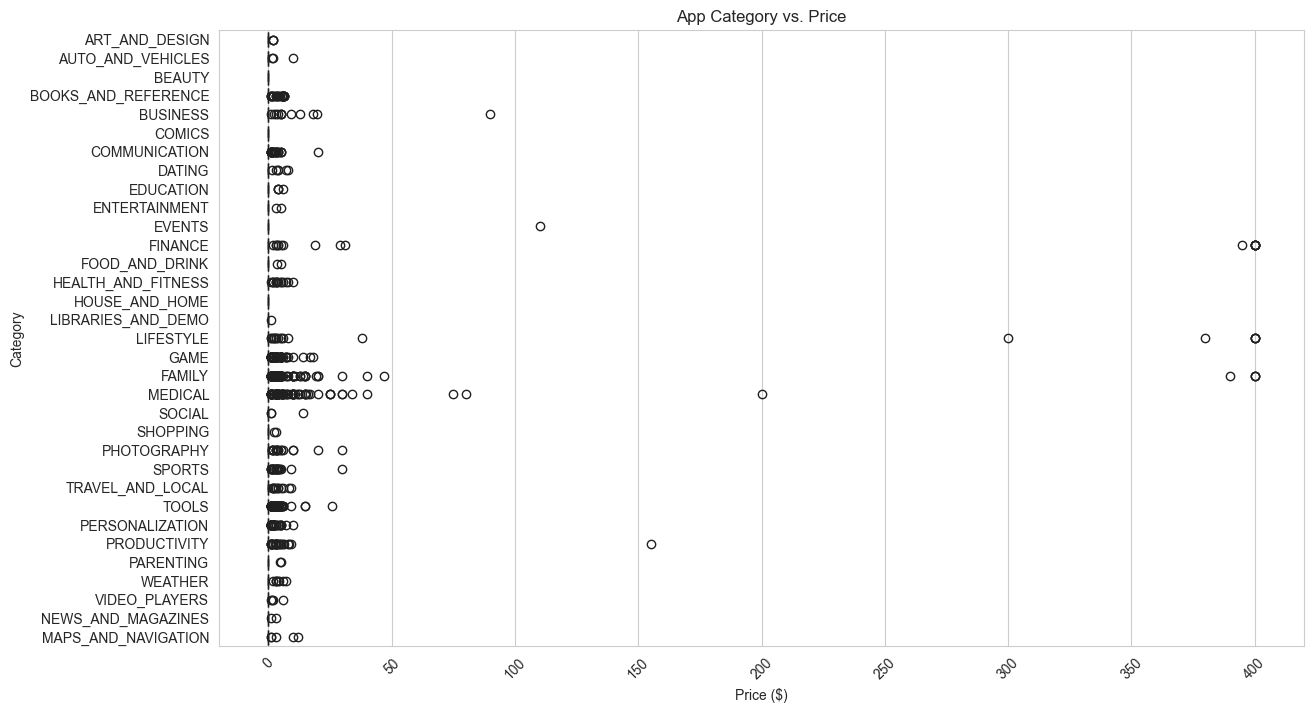

In [62]:
# Box plot of App Category vs. Price
plt.figure(figsize=(14, 8))
sns.boxplot(x='Price', y='Category', data=apps_df, palette='viridis')
plt.title('App Category vs. Price')
plt.xlabel('Price ($)')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_5188\2343292304.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories_by_installs.index, x=top_categories_by_installs.values, palette='coolwarm')


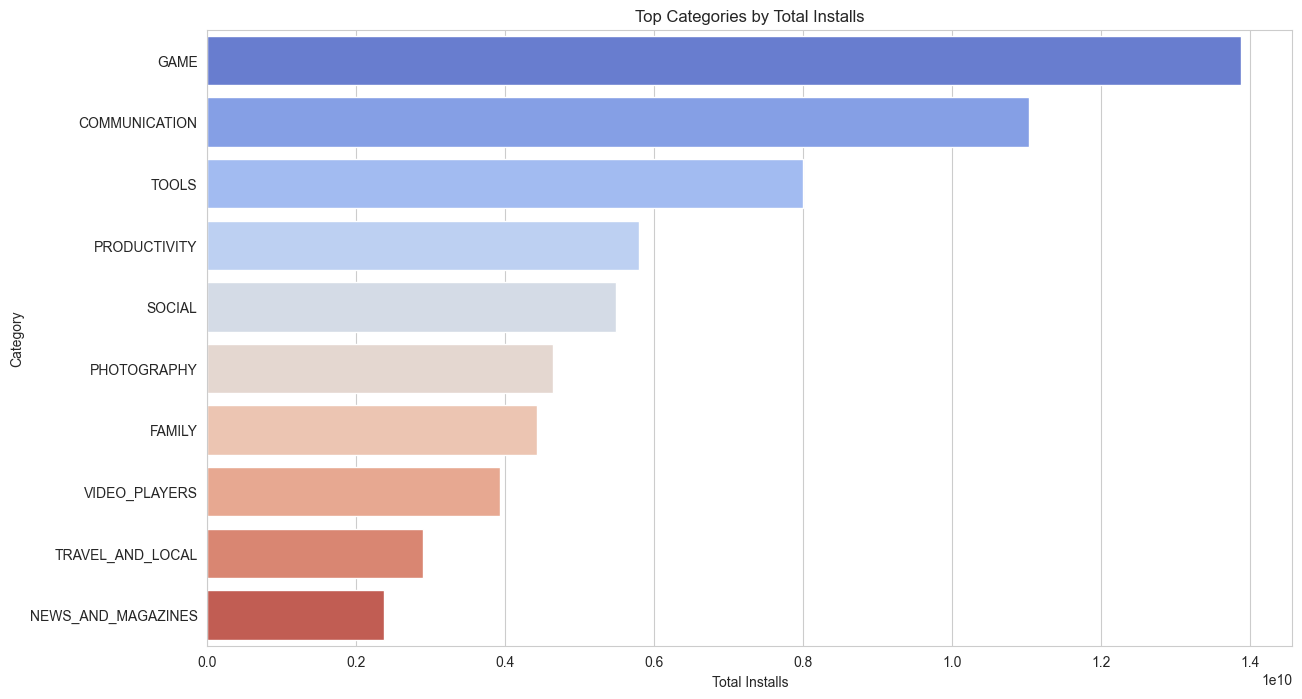

In [63]:
# Top Categories by Total Installs
plt.figure(figsize=(14, 8))
top_categories_by_installs = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_categories_by_installs.index, x=top_categories_by_installs.values, palette='coolwarm')
plt.title('Top Categories by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.show()

## Chart 9: Top Categories by Total Installs

Observation: The bar chart shows 'GAME,' 'COMMUNICATION,' and 'TOOLS' have the most installs, while 'NEWS_AND_MAGAZINES' has the least.

Conclusion: Popular categories reflect high user engagement, while less popular categories suggest fewer user interactions.

Solution: Focus on popular categories to maximize reach and installs. For less popular categories, use innovative features or niche marketing strategies.

In [79]:
import pandas as pd

# Calculate the correlation matrix for selected numerical features
corr_matrix = apps_df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr()

# Display the correlation matrix
print("Correlation Matrix of Numerical Features:")
print(corr_matrix)


Correlation Matrix of Numerical Features:
            Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.055081  0.063076  0.040143 -0.021199
Reviews   0.055081  1.000000  0.179321  0.625165 -0.007598
Size      0.063076  0.179321  1.000000  0.134291 -0.022434
Installs  0.040143  0.625165  0.134291  1.000000 -0.009405
Price    -0.021199 -0.007598 -0.022434 -0.009405  1.000000


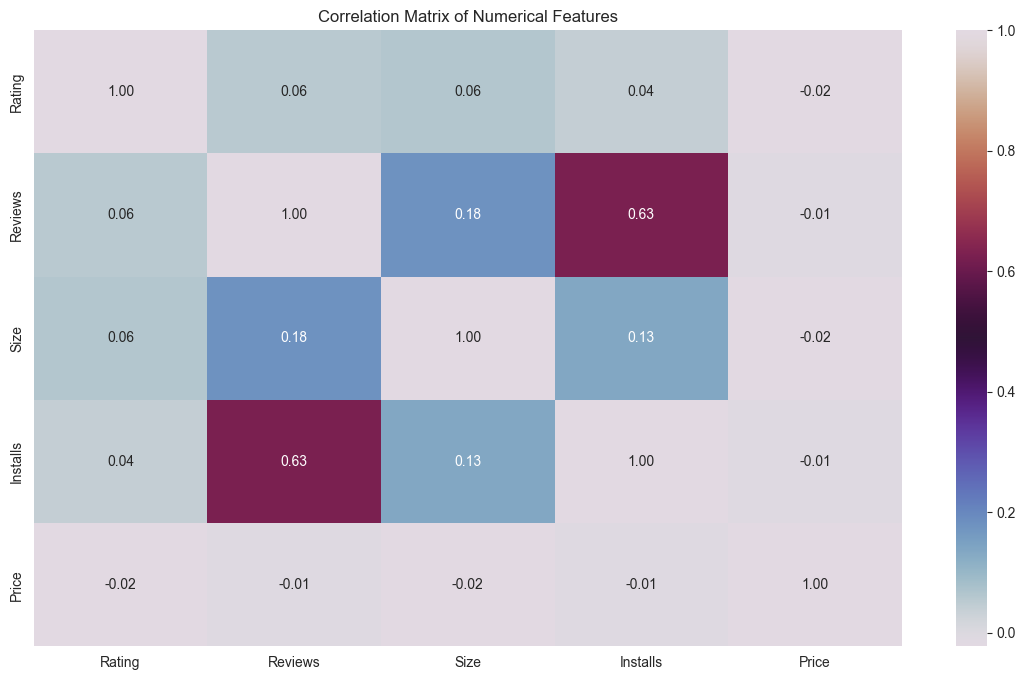

In [64]:
# Correlation Matrix
plt.figure(figsize=(14, 8))
corr_matrix = apps_df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='twilight', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Chart 10: Correlation Matrix for App Features

Observation: The correlation matrix shows the relationship between numerical features, with strong correlations between Reviews and Installs.

Conclusion: More installs lead to more reviews. Ratings have low correlations with other features.

Solution: Improve app quality and user experience to gain more installs and reviews. Focus on factors other than size and price to improve ratings.

In [65]:
# Filter out "junk" apps based on specific names or criteria
junk_apps = ['I Am Rich Premium', 'Most Expensive App (H)', 'Junk App 1', 'Junk App 2']  # Add more as needed
filtered_apps_df = apps_df[~apps_df['App'].isin(junk_apps)]

In [66]:
filtered_apps_df = filtered_apps_df[filtered_apps_df['Price'] < 20]

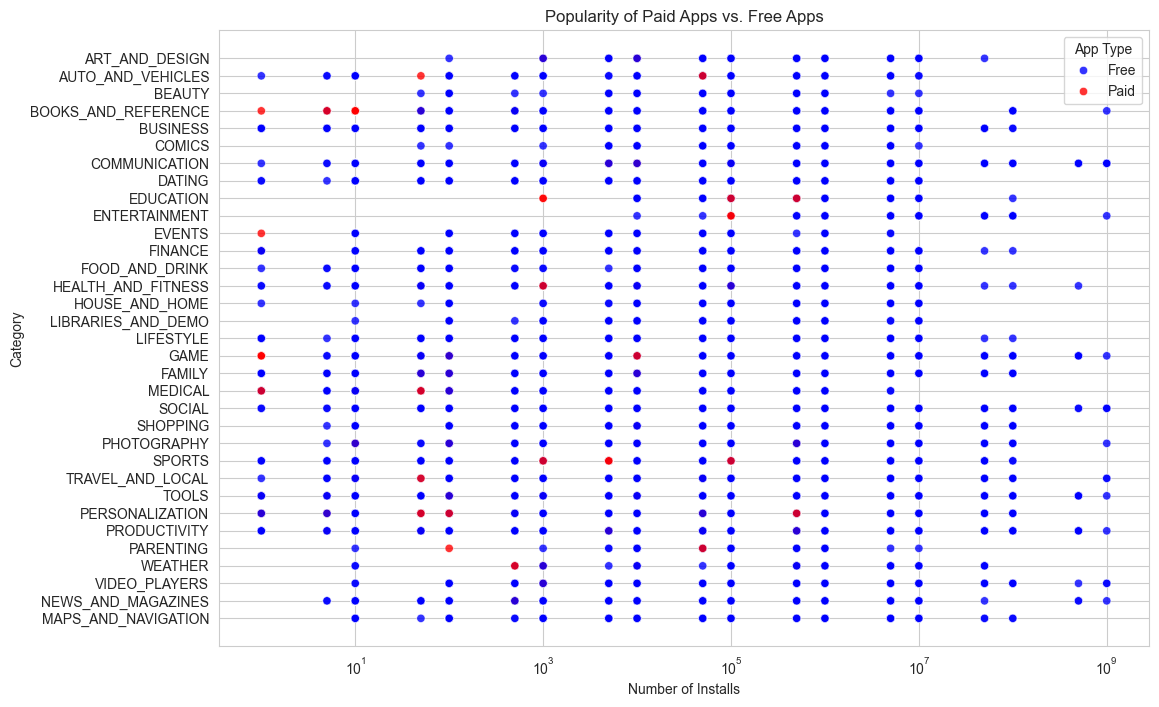

In [68]:
# Scatter plot of Installs vs. Category, differentiated by Paid or Free
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Installs', y='Category', hue='Type', data=apps_df, palette={'Paid': 'red', 'Free': 'blue'}, alpha=0.8)
plt.title('Popularity of Paid Apps vs. Free Apps')
plt.xlabel('Number of Installs')
plt.ylabel('Category')
plt.xscale('log')  
plt.legend(title='App Type')
plt.show()

## Chart 11: Popularity of Paid Apps vs. Free Apps

Observation: The scatter plot shows free apps have higher installs than paid apps, with significant numbers in 'GAME' and 'COMMUNICATION.'

Conclusion: Users prefer free apps, especially in popular categories.

Solution: Offer free versions

C:\Users\asus\AppData\Local\Temp\ipykernel_5188\919385818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


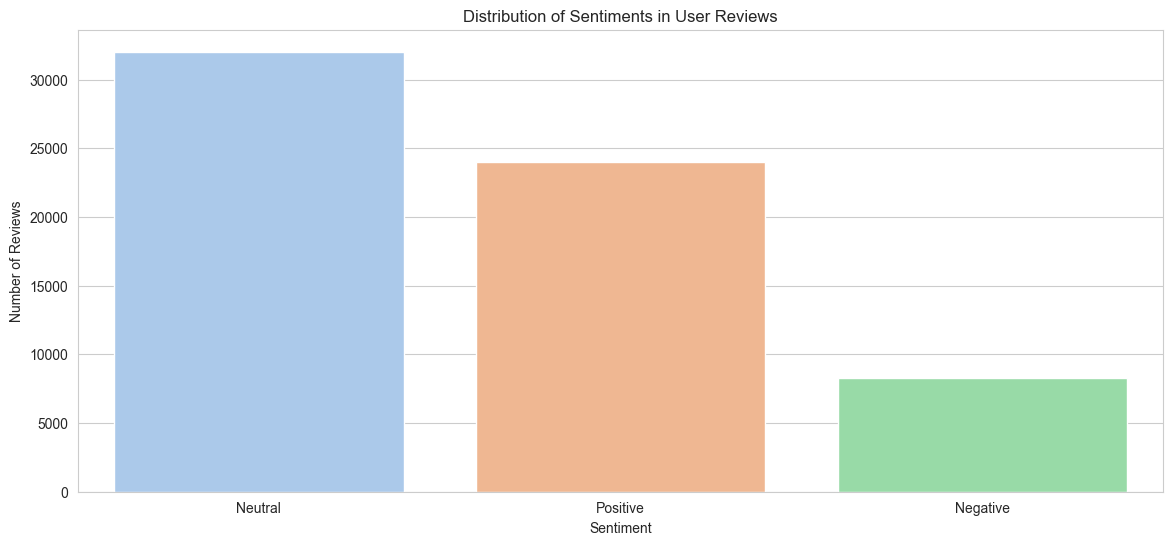

In [69]:
# Sentiment Analysis: Distribution of sentiments in user reviews
plt.figure(figsize=(14, 6))
sentiment_count = reviews_df['Sentiment'].value_counts()
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Distribution of Sentiments in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

## Chart 11 Distribution of Sentiments in User Reviews
Conclusion: Most user reviews are neutral, followed by positive, and the fewest are negative. This indicates that users have balanced feelings about the apps, with many having favorable experiences.

Solution: Focus on understanding and addressing issues mentioned in negative